In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
from pathlib import Path
import glob
from scipy.stats import t

In [2]:
data_path = Path.cwd()/'job_data'
files = [file for file in data_path.glob('est_par*.csv')]
files.sort()
df = pd.concat([pd.read_csv(file,header=None) for file in files],axis=0)
df.columns = ['a1','C2N','a3','a4','C5N','Vc','K1','K2','lam','cost']

In [3]:
df.head()

,a1,C2N,a3,a4,C5N,Vc,K1,K2,lam,cost
0,0.633074,1466.499185,0.772628,0.333963,1865.565743,0.103165,0.104576,0.010000,0.000037,103.376591
0,0.299738,300.315101,0.364391,0.998605,1998.682519,0.217438,0.150112,0.010001,0.000093,52.029118
0,0.685437,1413.358481,0.937858,1.000000,1648.376130,0.078148,0.212195,0.010001,0.000073,61.483753
0,0.512253,430.761044,0.676499,0.996843,1121.473442,0.057480,0.100003,0.011057,0.000150,41.020774
0,0.293760,1054.715437,0.358141,0.555870,1755.076824,0.230180,0.246998,0.010002,0.000040,94.837105


In [4]:
# Function to calculate confidence interval
def confidence_interval(df_column, confidence=0.95):
    n = len(df_column)
    mean = np.mean(df_column)
    sem = np.std(df_column, ddof=1)/ np.sqrt(n)  # Standard error of the mean
    t_value = t.ppf((1 + confidence) / 2, df=n-1)  # t-critical value
    margin_of_error = t_value * sem
    return mean - margin_of_error, mean + margin_of_error

# Calculate confidence intervals for each parameter
confidence_intervals = {}
for column in df.columns[0:]:
    confidence_intervals[column] = confidence_interval(df[column])

# Display the results
for param, ci in confidence_intervals.items():
    print(f"{param}: {ci}")

a1: (0.5180848472743893, 0.5959285966758305)
C2N: (693.859544635947, 1028.1816803707036)
a3: (0.6111328195090598, 0.700597111256439)
a4: (0.7776141577375079, 0.9133955487852571)
C5N: (1299.675881397554, 1494.6358247788921)
Vc: (0.09403544813038331, 0.11813429562109626)
K1: (0.1619542288451158, 0.21040544706031516)
K2: (0.01001731969680023, 0.01012599535353127)
lam: (5.96888521396952e-05, 7.401100293807178e-05)
cost: (69.13242567168864, 80.27229725825147)


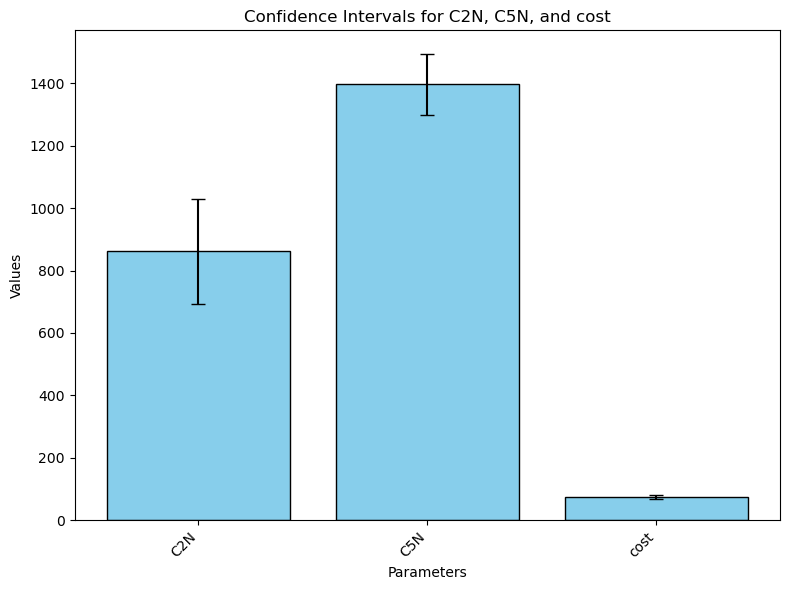

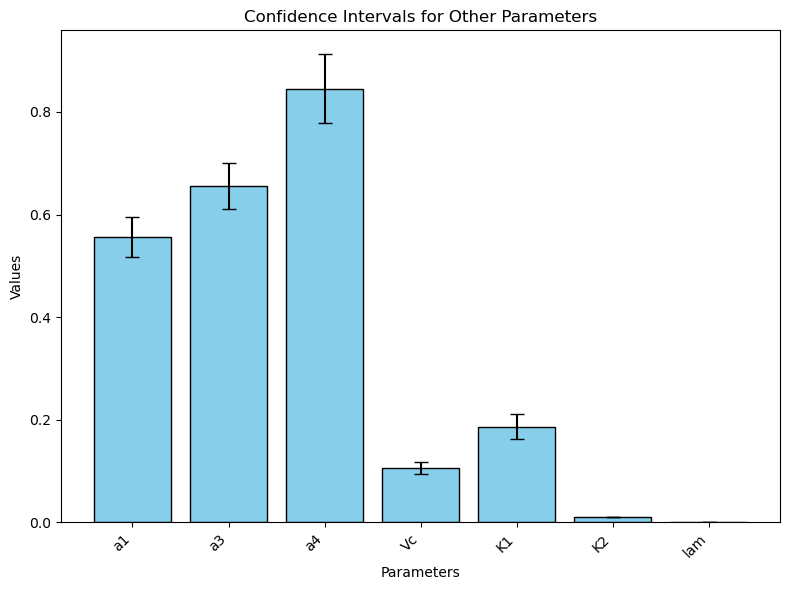

In [5]:
import matplotlib.pyplot as plt

# Group parameters
group1 = ['C2N', 'C5N', 'cost']  # Parameters to plot in one group
group2 = [param for param in confidence_intervals.keys() if param not in group1]  # Remaining parameters

# Function to plot confidence intervals
def plot_confidence_intervals(params, title):
    means = []
    lower_errors = []
    upper_errors = []

    for param in params:
        ci = confidence_intervals[param]
        mean = np.mean(df[param])
        means.append(mean)
        lower_errors.append(mean - ci[0])  # Lower error
        upper_errors.append(ci[1] - mean)  # Upper error

    # Calculate error bars
    errors = [lower_errors, upper_errors]

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.bar(params, means, yerr=errors, capsize=5, color='skyblue', edgecolor='black')
    plt.xlabel('Parameters')
    plt.ylabel('Values')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot group1 (C2N, C5N, cost)
plot_confidence_intervals(group1, 'Confidence Intervals for C2N, C5N, and cost')

# Plot group2 (other parameters)
plot_confidence_intervals(group2, 'Confidence Intervals for Other Parameters')

In [6]:
df.mean()

a1         0.557007
C2N      861.020613
a3         0.655865
a4         0.845505
C5N     1397.155853
Vc         0.106085
K1         0.186180
K2         0.010072
lam        0.000067
cost      74.702361
dtype: float64

/Users/sxa126/miniconda3/envs/Num_Sim/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sxa126/miniconda3/envs/Num_Sim/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sxa126/miniconda3/envs/Num_Sim/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sxa126/miniconda3/envs/Num_Sim/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

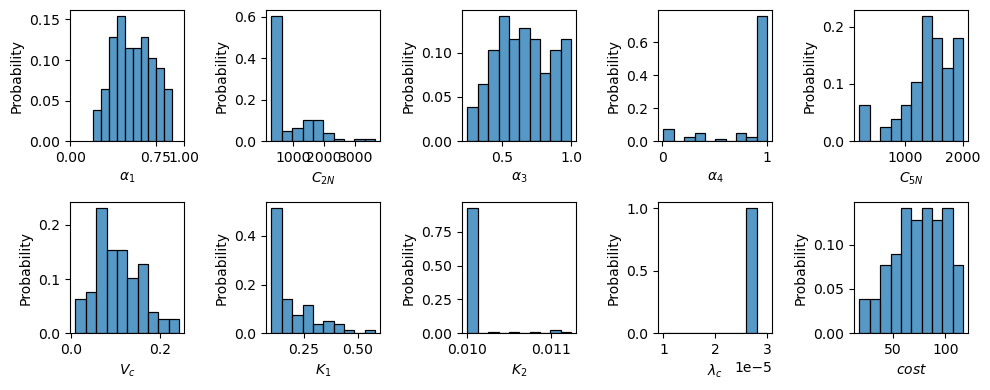

In [6]:
fig,ax = plt.subplots(2,5, figsize= [10,4])
bin =10
sns.histplot(df['a1'].values, bins = bin, stat='probability', ax=ax[0,0])
ax[0,0].set_xticks([0.0,0.75,1.0])
ax[0,0].set_xlabel(r'$\alpha_1$')
sns.histplot(df['C2N'].values, bins = bin, stat='probability', ax=ax[0,1])
ax[0,1].set_xlabel('$C_{2N}$')
sns.histplot(df['a3'].values,bins = bin, stat='probability',ax= ax[0,2])
ax[0,2].set_xlabel(r'$\alpha_3$')
sns.histplot(df['a4'].values,bins = bin, stat='probability',ax= ax[0,3])
ax[0,3].set_xlabel(r'$\alpha_4$')
sns.histplot(df['C5N'].values,bins = bin, stat='probability',ax= ax[0,4])
ax[0,4].set_xlabel('$C_{5N}$')
sns.histplot(df['Vc'].values,bins = bin, stat='probability',ax= ax[1,0])
ax[1,0].set_xlabel('$V_c$')
sns.histplot(df['K1'].values,bins = bin, stat='probability',ax= ax[1,1])
ax[1,1].set_xlabel('$K_1$')
sns.histplot(df['K2'].values,bins = bin,stat='probability',ax= ax[1,2])
ax[1,2].set_xlabel('$K_2$')
sns.histplot(df['lam'].values,bins = bin,binrange=(1e-5,3e-5),stat='probability',ax= ax[1,3])
ax[1,3].set_xlabel(r'$\lambda_c$')
sns.histplot(df['cost'].values,bins = bin, stat='probability',ax= ax[1,4])
ax[1,4].set_xlabel('$cost$')
plt.tight_layout()
plt.savefig('Kasumi1_Donor1.png')
plt.show()

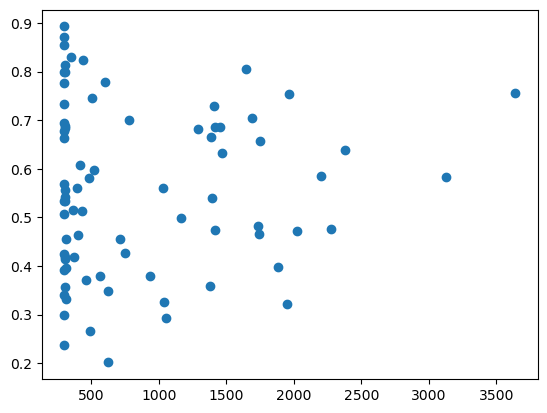

In [4]:
plt.plot(df['C2N'], df['a1'],'o')